In [121]:
import pandas as pd #pandas, needed for data frames.
import numpy as np #numpy, for math operations and arrays.
import matplotlib.pyplot as plt #matplotlib, for making plots.
import missingno as msno #missingno, a usefull library for checking missing values.
import pdb #pythondebugger, native debugger of python.
%matplotlib inline 
#plots graphs directly below codeblocks.

In [197]:
#Worlddatabank on Social Development Goals
world_bank = pd.read_csv("data/SDG_csv/SDGData.csv") #TODO: URL MUST BE ONLINE
#Dataset on life expectancy, WHO
life_expectancy = pd.read_csv("data/life-expectancy.csv") #TODO: URL MUST BE ONLINE
#Dataset on household pocketmoney, NHA. Second row is empty, so we skip it.
household_ppp = pd.read_excel("data/NHA-indicators.xlsx",skiprows=[1],index_col=0) #TODO: URL MUST BE ONLINE 

In [123]:
#Search world_bank database for keyphrase
def searchData(myInput):
    variableList = []
    for sentence in list(world_bank["Indicator Name"].values):
        newSentence = np.array(sentence.split(" "))
        for words in (newSentence):
            if words.lower() == myInput.lower(): 
                variableList += [sentence]

    variableList = pd.unique(variableList)
    return variableList
searchData("PPP") #insert search input here.
                                


array(['CO2 emissions (kg per 2011 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)',
       'Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'GDP per person employed (constant 2011 PPP $)',
       'GDP, PPP (constant 2011 international $)',
       'GDP, PPP (current international $)',
       'GNI per capita, PPP (constant 2011 international $)',
       'GNI per capita, PPP (current international $)',
       'GNI, PPP (constant 2011 international $)',
       'GNI, PPP (current international $)',
       'PPP conversion factor, GDP (LCU per international $)',
       'PPP conversion factor, private consumption (LCU per international $)'],
      dtype=object)

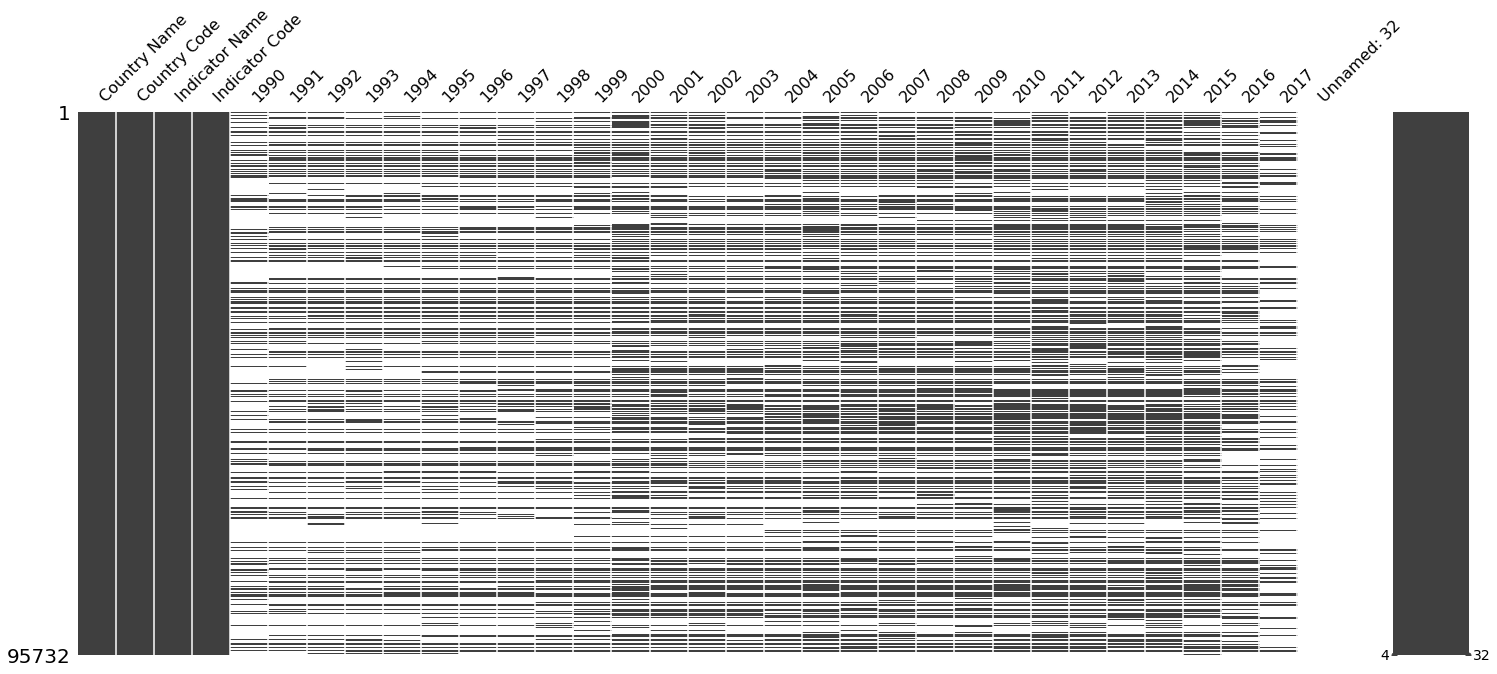

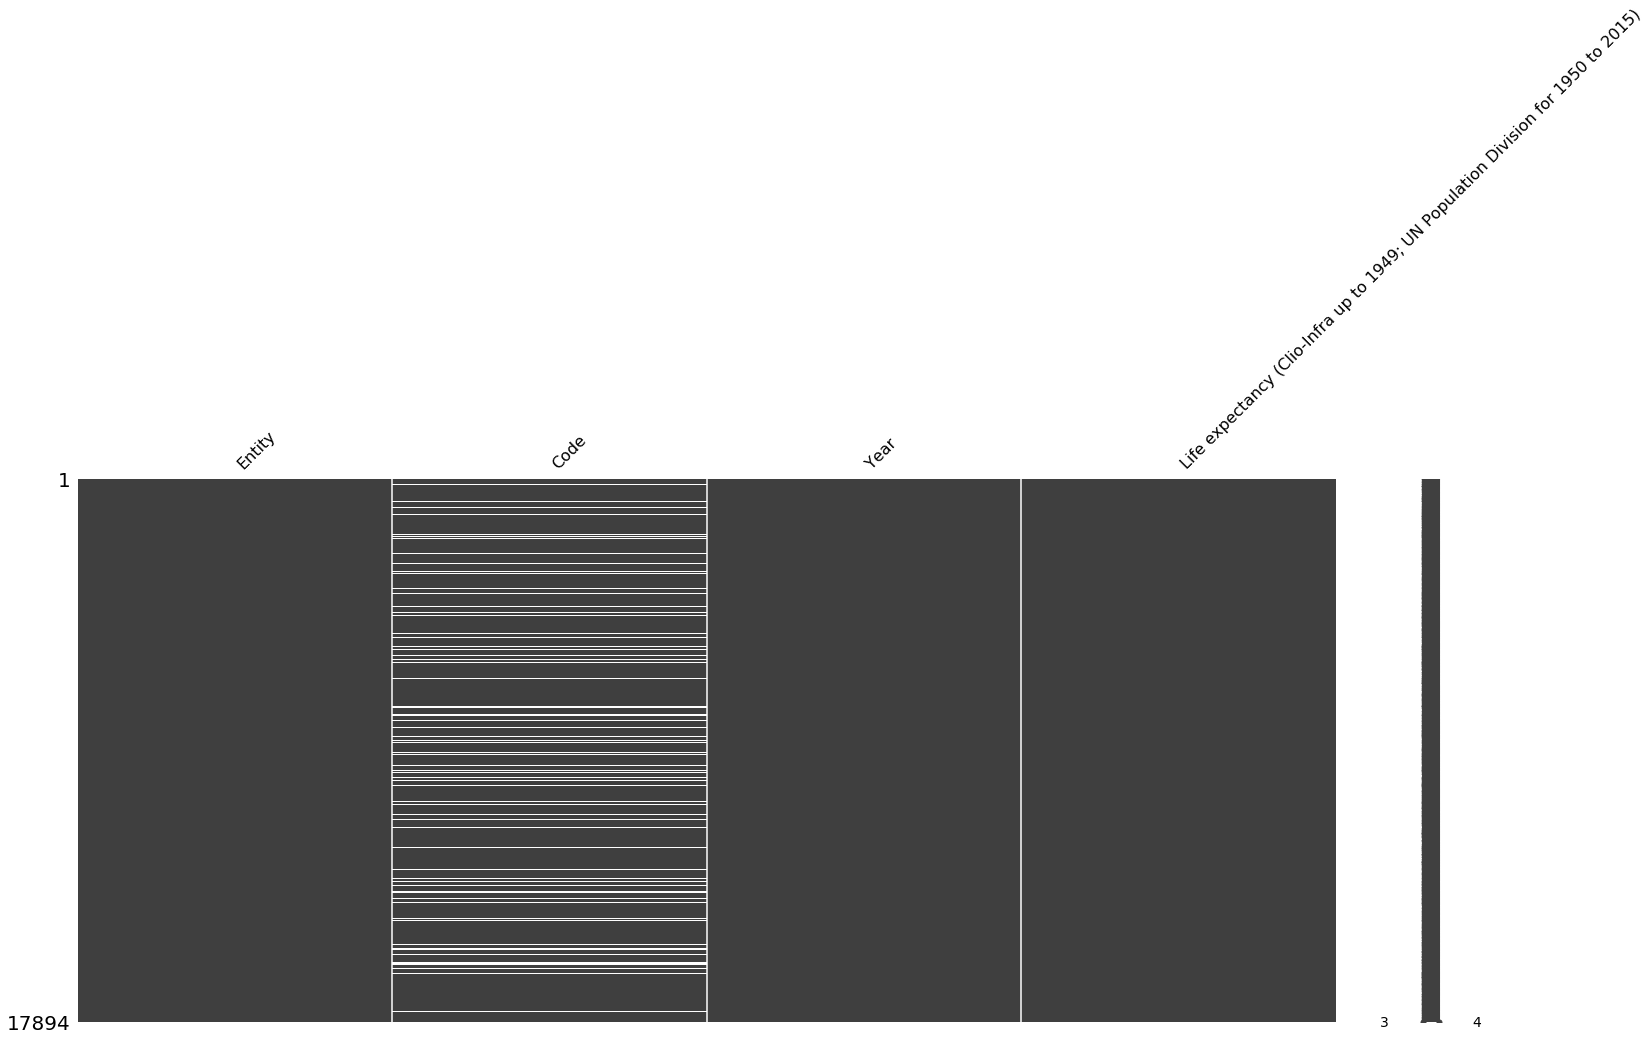

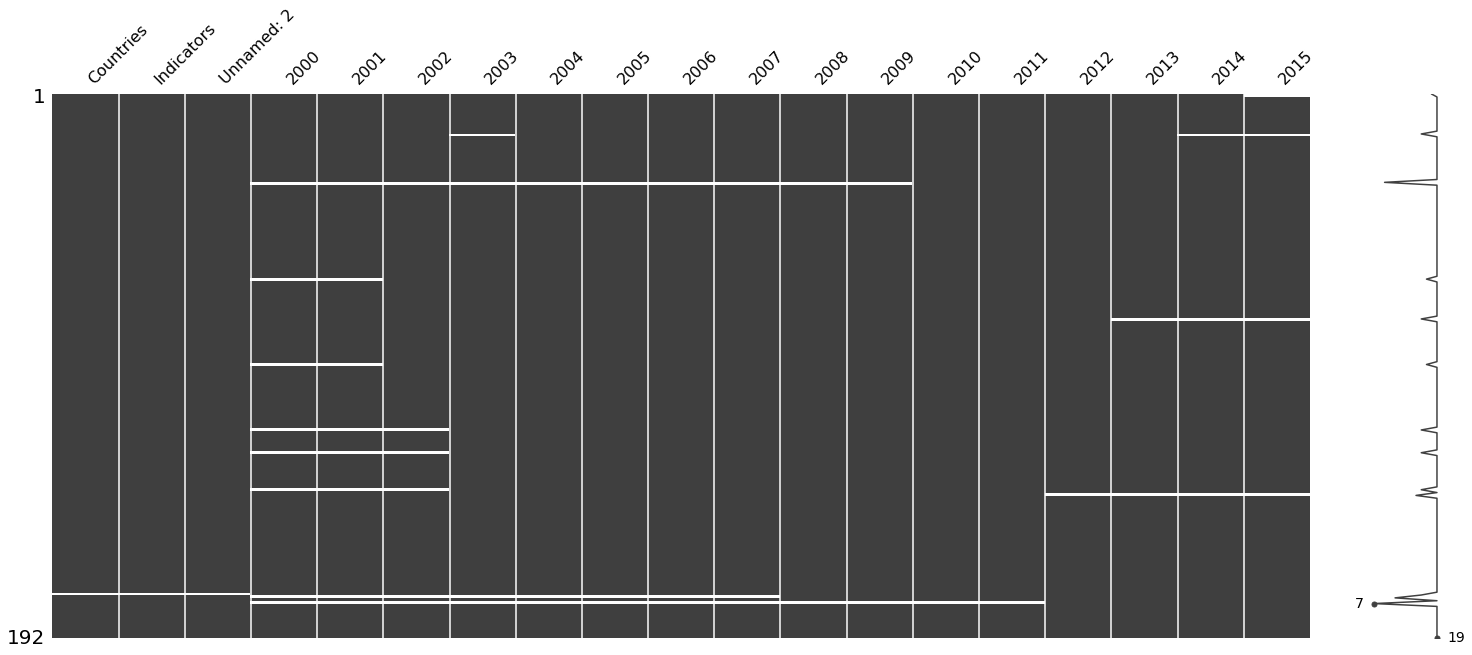

In [124]:
#First summarise status of data by making a NaN matrix.
msno.matrix(world_bank.sample(len(world_bank)))
msno.matrix(life_expectancy.sample(len(life_expectancy)))
msno.matrix(household_ppp.sample(len(household_ppp)))

In [170]:
#This function makes a Top 20 list of richest and poorest countries based on GDP per capita, PPP.
def findTop20():
    #Waarom doen we dit zo? Kunnen we niet gewoon world_bank["Country Name"].unique() nemen?
    countries = world_bank[world_bank["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["Country Name"]
    GDP_2016 = world_bank[world_bank["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["2016"]
    GDP_2017 = world_bank[world_bank["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["2017"]

    GDP_1617 = countries.to_frame().join(GDP_2017.to_frame()).join(GDP_2016.to_frame())
    
    #Mask the entries in the top 20's of the list which are actually not countries.
    GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="Macao SAR, China")
    GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="Hong Kong SAR, China")
    GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="North America")

    #Define the top20's
    lowest_20 = GDP_1617.sort_values("2017")[0:20]
    highest_20 = GDP_1617.sort_values("2017", ascending=False)[0:20]

    lowest_countries = lowest_20["Country Name"]
    highest_countries = highest_20["Country Name"]
    
    newCountries = pd.concat([lowest_countries, highest_countries])
    
    #if, for some reason, the top 20 does not contain 20 entries, throw an error.
    if len(lowest_countries) < 19:
        return str("Something went wrong.")
    else:
        return list(newCountries.values)


In [203]:
#Using the top 20 richest and poorest countries, find matching data in other dataset.
def matchDatabase(l):
    newDF = household_ppp.loc[l]
    return newDF
matchDatabase(findTop20()).values

C:\Users\Jochem\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


,Indicators,Unnamed: 2,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Countries,,,,,,,,,,,,,,,,,,
Central African Republic,Household out-of-pocket payment,in current US$ per capita,4.832313,4.694655,4.943164,5.939127,6.549299,6.578207,6.654809,7.283644,7.830363,7.794704,7.757623,8.399045,8.106944,5.827238,7.542742,6.589561
Burundi,Household out-of-pocket payment,in current US$ per capita,4.197771,3.719912,3.438550,3.103091,3.357498,5.649721,6.483249,6.453558,6.517935,6.846633,7.371043,6.342293,4.844562,4.596797,4.369424,4.630427
Liberia,Household out-of-pocket payment,in current US$ per capita,3.327470,2.206545,2.043052,1.876786,6.537255,7.325313,6.435595,9.419445,10.656616,10.027987,10.826974,12.375219,12.931920,13.073576,14.239178,13.605347
"Congo, Dem. Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Niger,Household out-of-pocket payment,in current US$ per capita,5.509593,5.630502,6.230933,7.861917,9.098615,9.583278,10.163671,11.655665,13.109222,13.061706,13.080141,14.417639,13.894755,13.983949,13.842951,13.445558
Malawi,Household out-of-pocket payment,in current US$ per capita,0.800179,0.755375,1.626784,1.467911,1.525164,1.544814,1.837562,2.875302,3.324541,3.909358,3.631102,3.439548,3.252126,2.585100,2.815865,3.758386
Mozambique,Household out-of-pocket payment,in current US$ per capita,1.716637,1.426399,1.740410,1.887626,2.153053,2.200456,2.219691,2.225246,2.407870,2.159287,1.773446,2.171515,2.516056,2.480542,2.371079,1.937392
Sierra Leone,Household out-of-pocket payment,in current US$ per capita,8.082079,14.878924,16.320056,17.081300,16.521031,17.817741,19.124762,22.018244,25.488704,24.644197,20.495177,28.878351,34.074172,51.720640,48.870799,40.794679
Comoros,Household out-of-pocket payment,in current US$ per capita,37.409420,36.247562,38.049670,45.557893,50.045847,50.044296,50.398673,54.891429,58.642841,55.512530,52.825039,55.338957,51.049004,52.631177,52.482397,43.796818
